**This notebook is an exercise in the [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/principal-component-analysis).**

---


### Principal component analysis (PCA)

- Clustering is a partitioning of the dataset based on proximity, structurally visualise PCA as partitioning of the variation in the data accordingly. 

- PCA is wonderful tool for discovering crucial relationships in the data additionally used in creation of more informative features accordingly.

- PCA is typically applied to standardised data. With standardised data "variation" means "correlation". With unstandardised data "variation" means "covariance".


- In the Abalone dataset are physical measurements taken from several thousand Tasmanian abalone

    Note: Abalone is a sea creature similar to that clam or an oyster accordingly.
    
- Inspect the following features; Couple features for now accordingly; the 'Height' and 'Diameter' of their shells.


- Imagine that within this data are "axes of variation" that describe the ways the abalone tend to differ from one another. Pictorially, these axes adapt and presents perpendicular line operating along the nature the natural dimensions of the data one axis for each feature accordingly.



- Istead of describing abalones by their 'Height' and 'Diameter', we could just as cateogorised them by their 'Size' and 'Shape' respectively; 

- The entire idea of PCA: instead of describing the data with the whole idea of PCA: describing the data with the original features, describe it with its axes of variation. The axes of variaation become the new features accordingly.

- The new geatures PCA constructs are actually like linear combination ( weighted sums) of the original features:

df["Size"] = 0.707 * X["Height"] + 0.707 * X["Diameter"]


df["Shape"] = 0.707 * X["Height"] - 0.707 * X["Diameter"]

- These new features are called the principal components of the data. The weights themselves are called laodings.

- There will be as many principal components as there are features in the original dataset: 

    (i) If we had used ten features intsead of two, we would have ended with ten components accoridingly. 
    
       Features \ Components	Size (PC1)	Shape (PC2)
                    Height	  0.707	    0.707
                    Diameter	0.707	-0.707
                    
                    


- This table of loading is telling us that in the **Size component**, Height and Diameter vary in the same direction (same sign), but in the Shape component they vary in the opposite direction (opposite sign).

- In each component, the loadings are all of the same magnitude and so the features contribute equally in both. 

- PCA also insists in amount of variation in each component. Additionally we can be notified from the figures that there is more variation in the data along the Size than along the Shape component accordingly.

- PCA generates this precise through each component's **percent of explained variance**.


- The Size component captures the majority of the variation between the Height and Diameter. It's important to remember, however, that the amount of variance in a component doesn't necessarily correpound to how good it is as a predictor: it depends on what your're trying to predict.



#### PCA for Feature Engineering

- There are two methodologies utlising PCA for feature engineering. Note: (MI: MUTUAL INFORMATIVE Scores)

  - First way in incorporated as a descriptive technique, since the components convey about the variation, you could compute the MI scores for the componenets and observe what kind of variation most predictive of your target respectively.
  
  
  - Provide ideas for kinds of features to generate; a product of 'Height' and 'Diameter' if Shape is important respectively. 


   - Second way to incoporate usage; the components themselves as features, therefore the components exposes  **variational structure of the data directly**,they can often be more informative than the original features accordingly. 
   
   
       - 1) Dimensionality reduction: When the features are highly redunatant( multicollinear, specifically). PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information.
       
       - 2) Anomaly detection: Unsually variation, not apparent from the original features will often be **highlighted in the low-variance components**. These components could be highly informative in an anomaly or outlier detection task.
       

      - 3) Noise reduction: Collection of sensor readings will often share some **common background noise**. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise-ratio.


     - 4) Decorrelation: Some ML algorithms struggles with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to operate with accordingly.
     
  
 
 - PCA basically gives you **direct access to the correlational structure of your data**.
     
     

### Note:

- PCA only operates with numeric features, like continous quantities or counts. 

- PCA is sensitive to scale. It's great initative to standardise the data before applying PCA, unless otherwise of alternative method accordingly. 

- Consider removing or constraining outliers, since they can contribute impact on the results.



### Example Practice - 1985 Automobiles

- We'll return to our Automobile dataset and apply PCA, using it as a descriptive technique to discover features. We'll look at other use-cases in the exercise.


- Defines the functions **plot_variance and make_mi_scores**.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from IPython.display import display

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



def plot_variance(pca, width=8, dpi=100):
    #Create figure
    fig, axs = plt.subplots(1,2)
    n= pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel = "Component", title="% Explained Variance", ylim=(0.0,1.0)

    )

    # Cummulative Variance 
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel = "Component", title ="% Cummulative Variance", ylim=(0.0, 1.0)
    
    )
    
    
    
  

    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
    
    
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores    


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


/tmp/ipykernel_77/2339189604.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
df = pd.read_csv("../input/fe-course-data/autos.csv")
    


- Selected four features that cover a range of properties, each of these features also has a **high MI scores with the target, price**. 

- Standardised the data since these features aren't naturally on the same scale. 

In [7]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [5]:
features = ["highway_mpg","engine_size","horsepower","curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardise
X_scaled = (X-X.mean(axis=0))/ X.std(axis=0)

- Incorporate into fit scikit-learn's PCA estimator and generate the principal components. 


In [8]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


- After fitting, the PCA instance contains the loadings in its components_ attribute.( We're following the convention that calls the transformed column in X_pca the components.



In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

In [10]:
loadings = pd.DataFrame(
    pca.components_.T, # transpose the matrix of loadings
    columns = component_names, # so the columns are the principal components.
    index = X.columns, # and the rows are the original features

)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


- The component (PC1) showcases the constrast between large, powerful vechicles with the poor gas milage, and smaller, more economical vechicles with good gas milage.  Proposed this as "Luxury/Economy" axis accordingly.  


- Next figure shows that our four chosen features mostly vary along the Luxury/Economy axis

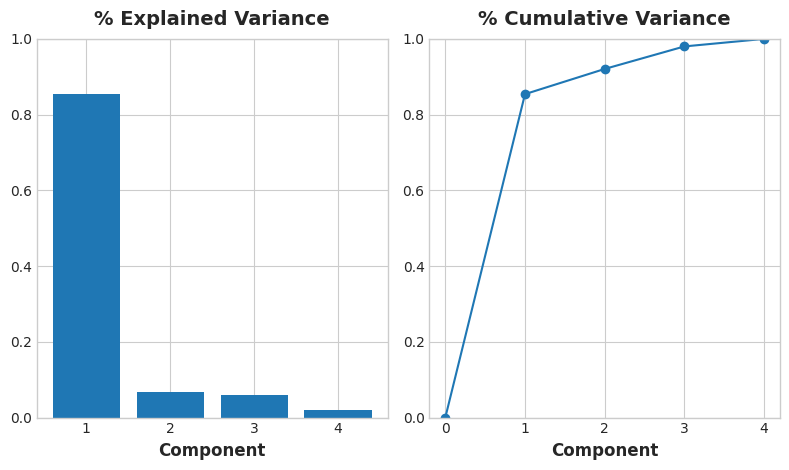

In [11]:
# Look at explained variance
plot_variance(pca);

- Focus at the MI scores the components. Unsurprisingly, PC1 is highly informative, though the remaining components, despite their small variance still have a significant relationship with price.



In [12]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.014661
PC2    0.379733
PC3    0.306860
PC4    0.204541
Name: MI Scores, dtype: float64

- The third component shows a contrast between horsepower and curb_weight -- sports cars vs. wagons, it seems.

In [ ]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

In [13]:
## Showcase the dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending = False).index
cols = ["make","body_style","horsepower","curb_weight"]
df.loc[idx,cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


In [20]:
## Showcase the dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending = False).index
cols = ["make","body_style","horsepower","curb_weight"]
idx

Index([118, 117, 119,  45,  96,  66, 124, 125,  14,   2,
       ...
        99, 107, 103, 100, 104,  59,  61, 101, 105, 143],
      dtype='int64', length=193)

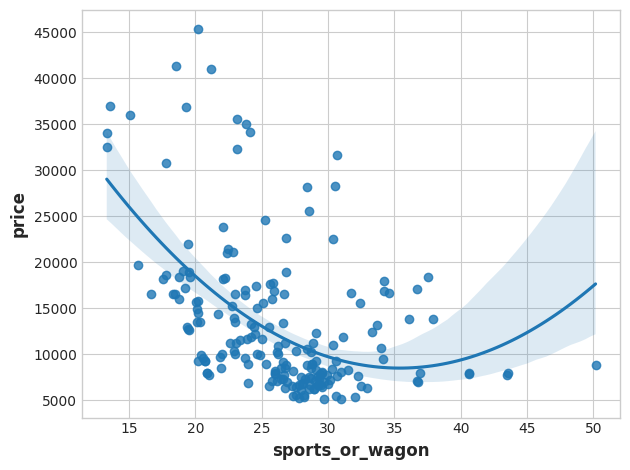

In [21]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);

# Introduction #

In this exercise, you'll work through several applications of PCA to the [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset.

Run this cell to set everything up!

In [22]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.feature_engineering_new.ex5 import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


df = pd.read_csv("../input/fe-course-data/ames.csv")

/tmp/ipykernel_77/755292237.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Let's choose a few features that are highly correlated with our target, `SalePrice`.


In [23]:
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

print("Correlation with SalePrice:\n")
print(df[features].corrwith(df.SalePrice))

Correlation with SalePrice:

GarageArea      0.640138
YearRemodAdd    0.532974
TotalBsmtSF     0.632529
GrLivArea       0.706780
dtype: float64


We'll rely on PCA to untangle the correlational structure of these features and suggest relationships that might be usefully modeled with new features.

Run this cell to apply PCA and extract the loadings.

In [24]:
X = df.copy()
y = X.pop("SalePrice")
X = X.loc[:, features]

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_pca, loadings = apply_pca(X)
print(loadings)

                   PC1       PC2       PC3       PC4
GarageArea    0.541229  0.102375 -0.038470  0.833733
YearRemodAdd  0.427077 -0.886612 -0.049062 -0.170639
TotalBsmtSF   0.510076  0.360778 -0.666836 -0.406192
GrLivArea     0.514294  0.270700  0.742592 -0.332837


# 1) Interpret Component Loadings

Look at the loadings for components `PC1` and `PC3`. Can you think of a description of what kind of contrast each component has captured? After you've thought about it, run the next cell for a solution.

In [25]:
# View the solution (Run this cell to receive credit!)
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The first component, `PC1`, seems to be a kind of "size" component, similar to what we saw in the tutorial: all of the features have the same sign (positive), indicating that this component is describing a contrast between houses having large values and houses having small values for these features.

The interpretation of the third component `PC3` is a little trickier. The features `GarageArea` and `YearRemodAdd` both have near-zero loadings, so let's ignore those. This component is mostly about `TotalBsmtSF` and `GrLivArea`. It describes a contrast between houses with a lot of living area but small (or non-existant) basements, and the opposite: small houses with large basements.


-------------------------------------------------------------------------------

Your goal in this question is to use the results of PCA to discover one or more new features that improve the performance of your model. One option is to create features inspired by the loadings, like we did in the tutorial. Another option is to use the components themselves as features (that is, add one or more columns of `X_pca` to `X`).

# 2) Create New Features

Add one or more new features to the dataset `X`. For a correct solution, get a validation score below 0.140 RMSLE. (If you get stuck, feel free to use the `hint` below!)

In [26]:
X = df.copy()
y = X.pop("SalePrice")

# YOUR CODE HERE: Add new features to X.
X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF


score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")


# Check your answer
q_2.check()

Your score: 0.13792 RMSLE


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Here are two possible solutions, though you might have been able to find others.
```python
# Solution 1: Inspired by loadings
X = df.copy()
y = X.pop("SalePrice")

X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF

score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")


# Solution 2: Uses components
X = df.copy()
y = X.pop("SalePrice")

X = X.join(X_pca)
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")
```


In [28]:
# Lines below will give you a hint or solution code
q_2.hint()
q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Try using the `make_mi_scores` function on `X_pca` to find out which components might have the most potential. Then look at the loadings to see what kinds of relationships among the features might be important.

Alternatively, you could use the components themselves. Try joining the highest scoring components from `X_pca` to `X`, or just join all of `X_pca` to `X`.


<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Here are two possible solutions, though you might have been able to find others.
```python
# Solution 1: Inspired by loadings
X = df.copy()
y = X.pop("SalePrice")

X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF

score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")


# Solution 2: Uses components
X = df.copy()
y = X.pop("SalePrice")

X = X.join(X_pca)
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")
```


-------------------------------------------------------------------------------

The next question explores a way you can use PCA to detect outliers in the dataset (meaning, data points that are unusually extreme in some way). Outliers can have a detrimental effect on model performance, so it's good to be aware of them in case you need to take corrective action. PCA in particular can show you anomalous *variation* which might not be apparent from the original features: neither small houses nor houses with large basements are unusual, but it is unusual for small houses to have large basements. That's the kind of thing a principal component can show you.

Run the next cell to show distribution plots for each of the principal components you created above.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

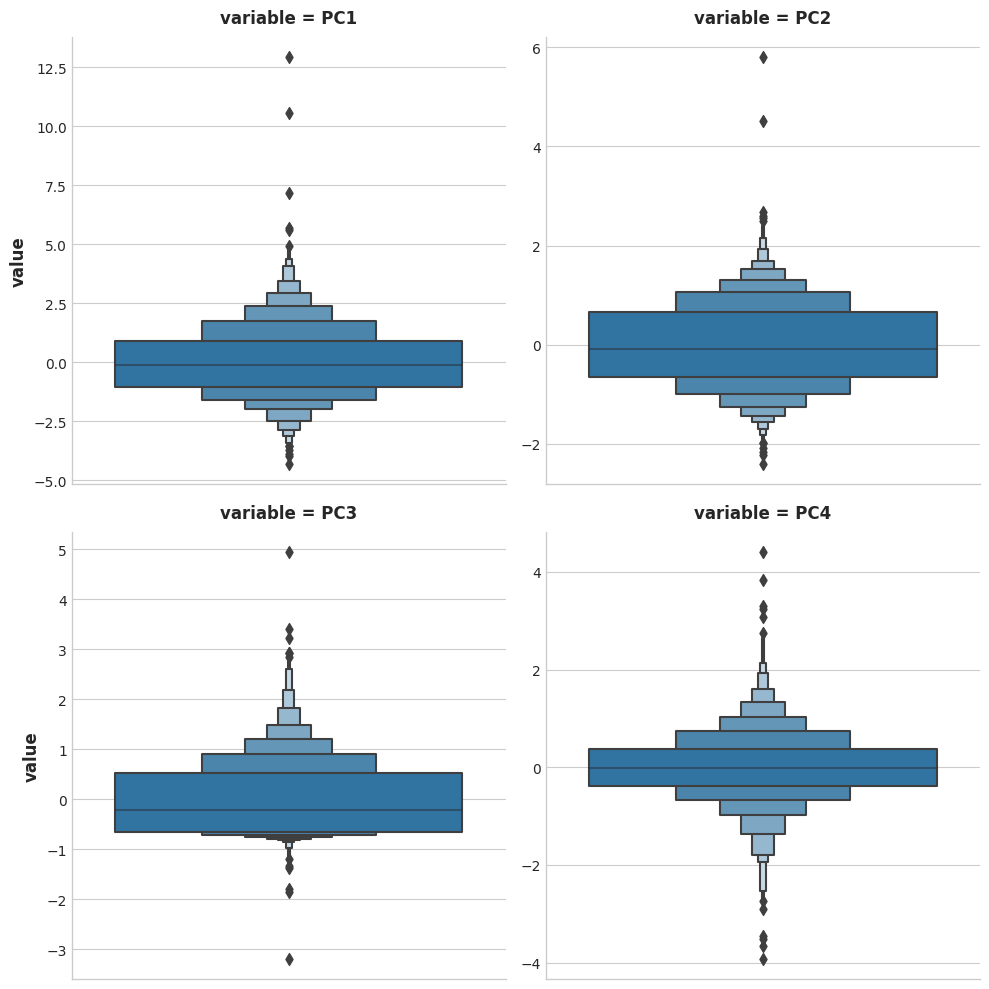

In [29]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);

As you can see, in each of the components there are several points lying at the extreme ends of the distributions -- outliers, that is.

Now run the next cell to see those houses that sit at the extremes of a component:

In [30]:
# You can change PC1 to PC2, PC3, or PC4
component = "PC1"

idx = X_pca[component].sort_values(ascending=False).index
df.loc[idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

,SalePrice,Neighborhood,SaleCondition,GarageArea,YearRemodAdd,TotalBsmtSF,GrLivArea
1498,160000,Edwards,Partial,1418.0,2008,6110.0,5642.0
2180,183850,Edwards,Partial,1154.0,2009,5095.0,5095.0
2181,184750,Edwards,Partial,884.0,2008,3138.0,4676.0
1760,745000,Northridge,Abnorml,813.0,1996,2396.0,4476.0
1767,755000,Northridge,Normal,832.0,1995,2444.0,4316.0
...,...,...,...,...,...,...,...
662,59000,Old_Town,Normal,0.0,1950,416.0,599.0
2679,80500,Brookside,Normal,0.0,1950,0.0,912.0
2879,51689,Iowa_DOT_and_Rail_Road,Abnorml,0.0,1950,0.0,729.0
780,63900,Sawyer,Normal,0.0,1950,0.0,660.0


# 3) Outlier Detection

Do you notice any patterns in the extreme values? Does it seem like the outliers are coming from some special subset of the data?

After you've thought about your answer, run the next cell for the solution and some discussion.

In [31]:
# View the solution (Run this cell to receive credit!)
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Notice that there are several dwellings listed as `Partial` sales in the `Edwards` neighborhood that stand out. A partial sale is what occurs when there are multiple owners of a property and one or more of them sell their "partial" ownership of the property.

These kinds of sales are often happen during the settlement of a family estate or the dissolution of a business and aren't advertised publicly. If you were trying to predict the value of a house on the open market, you would probably be justified in removing sales like these from your dataset -- they are truly outliers.


# Keep Going #

[**Apply target encoding**](https://www.kaggle.com/ryanholbrook/target-encoding) to give a boost to categorical features.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*